In [26]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from datetime import datetime

In [27]:
# This turns all the axes white in all the matplotlib plots. Comment this out if you dont want that
COLOR = 'white'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR

In [28]:
df_transaction = pd.read_csv('./datasets/ieee-fraud-detection/train_transaction.csv')
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.utils import resample

# Separate fraud and non-fraud data
df_fraud = df[df['isFraud'] == 1]
df_non_fraud = df[df['isFraud'] == 0]

# Upsample fraud data to match non-fraud data size
df_fraud_upsampled = resample(df_fraud, replace=True, n_samples=len(df_non_fraud), random_state=0)

# Combine fraud and non-fraud data
df_transaction = pd.concat([df_non_fraud, df_fraud_upsampled])

In [36]:
df = df.sample(frac=1)
is_Fraud1 = df.loc[df['isFraud'] == 1]
is_Fraud0 = df.loc[df['isFraud'] == 0]

normal_distributed_df = pd.concat([is_Fraud1, is_Fraud1, is_Fraud1, is_Fraud1, is_Fraud1,
                                    is_Fraud1, is_Fraud1, is_Fraud1, is_Fraud1, is_Fraud1,
                                   is_Fraud0])

# Shuffle dataframe rows
df = normal_distributed_df.sample(frac=1, random_state=42)
df.head()


,isFraud,TransactionDT,TransactionAmt,ProductCD,P_emaildomain,R_emaildomain,card4
171998,1,3713168,60.399,C,outlook.com,outlook.com,visa
172851,1,3734531,20.172,C,gmail.com,gmail.com,visa
367093,1,9130719,200.000,R,anonymous.com,yahoo.com,visa
68580,1,1547376,100.000,R,gmail.com,yahoo.com,visa
398680,1,10046368,22.355,C,anonymous.com,anonymous.com,visa


In [37]:
# Neural Network
features = ['isFraud', 'TransactionDT',
            'TransactionAmt','ProductCD', 'P_emaildomain','R_emaildomain', 'card4']

df = df_transaction[features]
df.head()

target = 'isFraud'
cat = ['TransactionDT','ProductCD', 'P_emaildomain','R_emaildomain', 'card4']
num = ['TransactionAmt']

df = df.dropna()
y = df[target].values

x_cat = df.filter(items = cat).values 
x_num = df.filter(items = num).values

labelencoder_X = LabelEncoder()
for i in range(len(cat)): 
    x_cat[:, i] = labelencoder_X.fit_transform(x_cat[:, i])
    
X = np.concatenate((x_cat, x_num), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

X_train = np.asarray(X_train).astype('float32') 
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
X_val = np.asarray(X_val).astype('float32')
y_val = np.asarray(y_val).astype('float32').reshape((-1,1))

X_train.shape, y_train.shape

model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)) 
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=10)

val_loss, val_acc = model.evaluate(X_val, y_val)
print(val_loss, val_acc)


Epoch 1/10
4619/4619 [==============================] - 3s 691us/step - loss: 20.4817 - accuracy: 0.5341
Epoch 2/10
4619/4619 [==============================] - 3s 683us/step - loss: 0.7271 - accuracy: 0.5250
Epoch 3/10
4619/4619 [==============================] - 3s 685us/step - loss: 0.7232 - accuracy: 0.5025
Epoch 4/10
4619/4619 [==============================] - 3s 690us/step - loss: 0.7364 - accuracy: 0.4984
Epoch 5/10
4619/4619 [==============================] - 3s 690us/step - loss: 0.7078 - accuracy: 0.5006
Epoch 6/10
4619/4619 [==============================] - 3s 715us/step - loss: 0.7405 - accuracy: 0.4991
Epoch 7/10
4619/4619 [==============================] - 3s 703us/step - loss: 0.7153 - accuracy: 0.4993
Epoch 8/10
4619/4619 [==============================] - 3s 682us/step - loss: 0.6975 - accuracy: 0.5000
Epoch 9/10
4619/4619 [==============================] - 3s 689us/step - loss: 0.6993 - accuracy: 0.4988
Epoch 10/10
1155/1155 [==============================] - 1s 389

1155/1155 [==============================] - 0s 329us/step
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.66     18397
         1.0       0.00      0.00      0.00     18554

    accuracy                           0.50     36951
   macro avg       0.25      0.50      0.33     36951
weighted avg       0.25      0.50      0.33     36951



/Users/saefurukawa/opt/anaconda3/envs/pai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saefurukawa/opt/anaconda3/envs/pai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saefurukawa/opt/anaconda3/envs/pai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

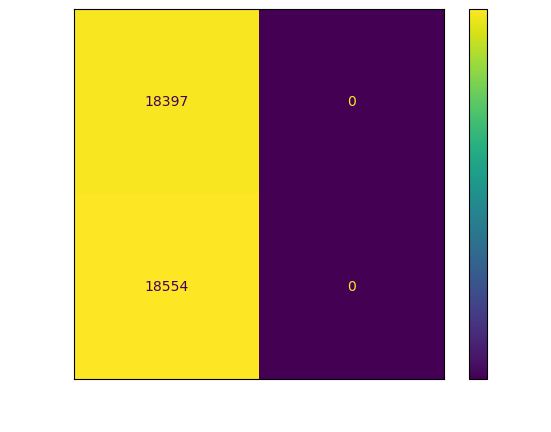

In [38]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Predict on validation set
y_pred = model.predict(X_val)
y_pred = np.round(y_pred)


print(classification_report(y_val, y_pred))
conf_mat = confusion_matrix(y_val, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [False, True])
cm_display.plot()
plt.show()